<a href="https://colab.research.google.com/github/mallelapreethi/Data-science-projects/blob/main/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing dependencies**

In [3]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn import over_sampling
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import linear_model # All required models are imported
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore") # To ignore warnings

#**Exploratory Data Analysis**

In [4]:
# Uploading the dataset files, one is train file and other is test file
from google.colab import files
train = files.upload()
test = files.upload()

Saving Train_data.csv to Train_data (1).csv


Saving test_data.csv to test_data (1).csv


In [5]:
# Loading the dataset files
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("test_data.csv")
# Combine train and test data
df = pd.concat([train, test], ignore_index=True)
df = df.sample(frac=1, random_state=100).reset_index(drop=True)

In [6]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.590548,0.838305,0.982231,0.312286,0.231827,0.232005,0.088997,0.564043,0.732186,0.971942,...,0.029015,0.944303,0.852007,0.363001,0.805746,0.153940,0.179071,0.411124,0.477137,Diabetes
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.457277,0.426126,0.616726,0.663983,0.112105,0.432341,0.542860,0.222365,0.076626,0.627287,...,0.699198,0.300671,0.489317,0.639290,0.024872,0.799810,0.416907,0.521741,0.766426,Anemia
3,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes
4,0.601246,0.012139,0.077618,0.999393,0.785517,0.044565,0.606256,0.793159,0.842642,0.959010,...,0.508182,0.041583,0.275799,0.771136,0.900877,0.466364,0.520529,0.709233,0.481601,Diabetes


In [7]:
df.shape

(2837, 25)

In [8]:
# checking the datatypes of features and the presence of null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

This dataset consists of 24 features and 1 label for 2351 instances. There are no issing values so handling of missing values is not needed here. All data is numerical. Only labels we need to convert into numbers(0, 1, 2, 3, 4). All data is between 0 and 1 so no need to perform Feature Scaling.

In [9]:
# checking numerical values distribution in the dataset
df.describe()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.395643,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.266795,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.189918,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.335778,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.597671,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [10]:
df['Disease'].value_counts() # checking the counts of each disease class

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

Disease
Anemia      24.920691
Diabetes    29.397251
Healthy     19.774410
Heart Di     1.374692
Thalasse    19.633416
Thromboc     4.899542
Name: Disease, dtype: float64
------------------------------------------


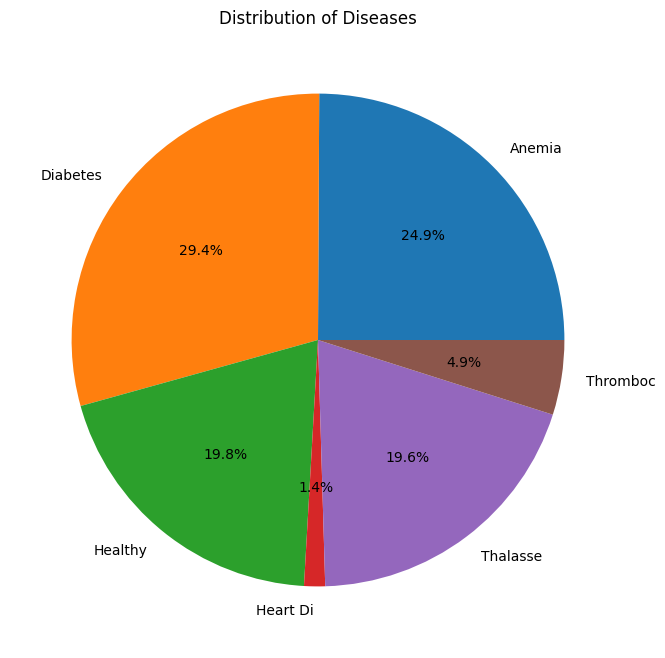

In [11]:
print((df.groupby('Disease')['Disease'].count()/df['Disease'].count())*100)
print("------------------------------------------")
((df.groupby('Disease')['Disease'].count()/df['Disease'].count())*100).plot.pie(autopct='%1.1f%%', title="Distribution of Diseases", figsize=(8, 8))

plt.ylabel('')  # Removing the y-label for better appearance

plt.show()

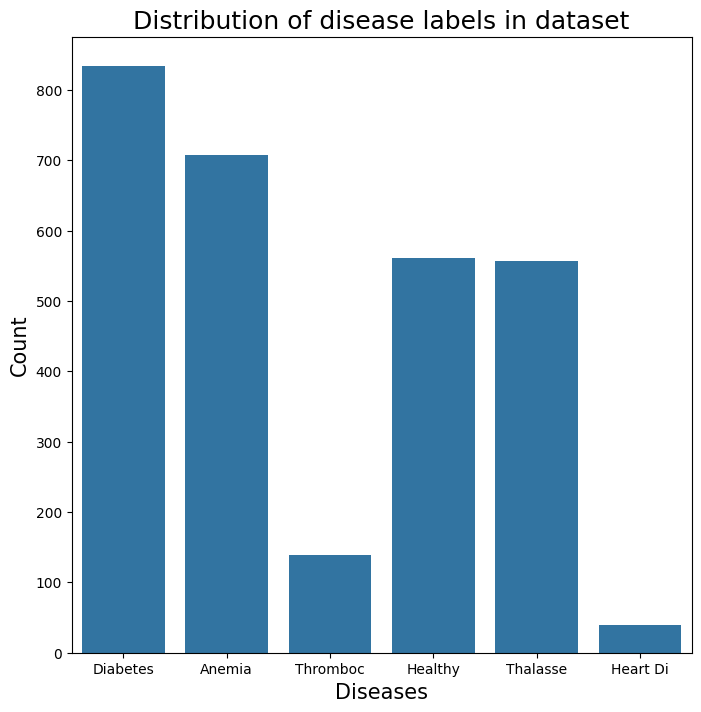

In [12]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Disease', data=df)
plt.title('Distribution of disease labels in dataset', fontsize=18)
plt.xlabel('Diseases', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

**We can understand that given dataset is a imbalanced dataset. Thromboc, Heart disease examples are very less this leads to bias in the model. So we have to resample this.**

In [13]:
# Define the mapping from category names to integer representations
category_map = {'Healthy': 0, 'Anemia': 1, 'Diabetes': 2, 'Heart Di': 3, 'Thalasse': 4, 'Thromboc': 5}

# Replace category names with integer representations in the 'Disease' column
df['Disease'] = df['Disease'].replace(category_map)


In [14]:
X = df.drop(['Disease'], axis=1)
y = df['Disease']

In [15]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling  # oversampling using SMOTE after StratifiedKFold

skf = StratifiedKFold(n_splits = 5, random_state=None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
  X_t = X.loc[train_index]
  y_t = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  SMOTE = over_sampling.SMOTE(random_state=100)
  X_train, y_train = SMOTE.fit_resample(X_t, y_t)

In [16]:
# getting to know no.of records in train and test dataset after StratifiedKFold and SMOTE
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4008, 24)
y_train shape: (4008,)
X_test shape: (567, 24)
y_test shape: (567,)


In [17]:
dfs = pd.concat([X_train, y_train], axis=1) # Combining features and labels of train dataset to check the class balance

In [18]:
# Define the mapping from category names to integer representations
category_map = {0:'Healthy', 1:'Anemia', 2:'Diabetes', 3:'Heart Di', 4:'Thalasse', 5:'Thromboc'}

# Replace category names with integer representations in the 'Disease' column
dfs['Disease'] = dfs['Disease'].replace(category_map)


Disease
Anemia      16.666667
Diabetes    16.666667
Healthy     16.666667
Heart Di    16.666667
Thalasse    16.666667
Thromboc    16.666667
Name: Disease, dtype: float64
------------------------------------------


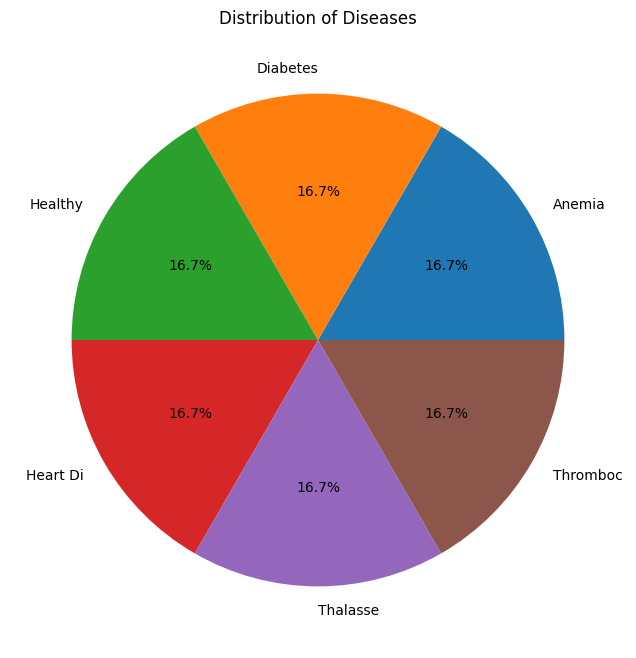

In [19]:
print((dfs.groupby('Disease')['Disease'].count()/dfs['Disease'].count())*100)
print("------------------------------------------")
((dfs.groupby('Disease')['Disease'].count()/dfs['Disease'].count())*100).plot.pie(autopct='%1.1f%%', title="Distribution of Diseases", figsize=(8, 8))

plt.ylabel('')  # Removing the y-label for better appearance

plt.show()

**Now the dataset is balanced**

#**Model building**

In [20]:
# function for plotting confuison matrix
def Plot_confusion_matrix(y, pred):
    category_names = ['Healthy', 'Anemia', 'Diabetes', 'Heart Di', 'Thalasse', 'Thromboc']
    cm = confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title('Confusion matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(category_names))
    plt.xticks(ticks, category_names, rotation=45)
    plt.yticks(ticks, category_names)

    # Add text annotations
    thresh = cm.max() / 2
    for i in range(len(category_names)):
        for j in range(len(category_names)):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.colorbar()
    plt.tight_layout()
    plt.show()

In [21]:
# Logistic regression
def LogisticModel(results, X_train, y_train, x_test, y_test):
  # Initialize LogisticRegression model
  model = LogisticRegression(penalty='none', max_iter=10000, fit_intercept=True, solver='newton-cg', tol=10, random_state=100)
  # Train the model
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  # Test report on test dataset
  Accuracy = metrics.accuracy_score(y_pred=pred, y_true=y_test)
  print("Accuracy of Logistic Regression model: ", Accuracy)
  Precision = metrics.precision_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Precision score of Logistic Regression model: ", Precision)
  Recall = metrics.recall_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Recall score of Logistic Regression model: ", Recall)
  F1 = metrics.f1_score(y_pred=pred, y_true=y_test, average='weighted')
  print("F1 score of Logistic Regression model: ", F1)
  print("Confuison matrix")
  Plot_confusion_matrix(y_test, pred)
  print("Classification report")
  print(classification_report(y_test, pred))
  new_results = pd.DataFrame({'Model': ["Logistic Regression"], 'Accuracy': [Accuracy], 'Precision': [Precision], 'Recall': [Recall], 'F1-score': [F1]})
  results = pd.concat([results, new_results], ignore_index=True)
  return results

In [22]:
# KNN model
def KNNModel(results, X_train, y_train, X_test, y_test):
  # Initialize KNN model
  knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=16)
   # Train the model
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("Model score: ", score)
  # Test report on test dataset
  pred = knn.predict(X_test)
  Accuracy = metrics.accuracy_score(y_pred=pred, y_true=y_test)
  print("Accuracy of KNN model: ", Accuracy)
  Precision = metrics.precision_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Precision score of KNN model: ", Precision)
  Recall = metrics.recall_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Recall score of KNN model: ", Recall)
  F1 = metrics.f1_score(y_pred=pred, y_true=y_test, average='weighted')
  print("F1 score of KNN model: ", F1)
  print("Confuison matrix")
  Plot_confusion_matrix(y_test, pred)
  print("Classification report")
  print(classification_report(y_test, pred))
  new_results = pd.DataFrame({'Model': ["KNN"], 'Accuracy': [Accuracy], 'Precision': [Precision], 'Recall': [Recall], 'F1-score': [F1]})
  results = pd.concat([results, new_results], ignore_index=True)
  return results

In [23]:
# Deciison Tree model
def DecisionTreeModel(results, X_train, y_train, X_test, y_test):
  criteria = ['gini', 'entropy']
  for c in criteria:
    # Initialize
    dt = DecisionTreeClassifier(criterion=c, random_state=100)
    dt.fit(X_train, y_train) # Train the model
    pred = dt.predict(X_test)
    print("Decision Tree with {0} criteria".format(c))
    # Test report on test dataset
    Accuracy = dt.score(X_test, y_test)
    print("Accuracy: ", Accuracy)
    Precision = metrics.precision_score(y_pred=pred, y_true=y_test, average='weighted')
    print("Precision score: ", Precision)
    Recall = metrics.recall_score(y_pred=pred, y_true=y_test, average='weighted')
    print("Recall score: ", Recall)
    F1 = metrics.f1_score(y_pred=pred, y_true=y_test, average='weighted')
    print("F1 score: ", F1)
    print("Confuison matrix")
    Plot_confusion_matrix(y_test, pred)
    print("Classification report")
    print(classification_report(y_test, pred))
    new_results = pd.DataFrame({'Model': ["Decision Tree with {0} criteria".format(c)], 'Accuracy': [Accuracy], 'Precision': [Precision], 'Recall': [Recall], 'F1-score': [F1]})
    results = pd.concat([results, new_results], ignore_index=True)
  return results

In [24]:
# Random Forest Classifier
def RandomForestModel(results, X_train, y_train, X_test, y_test):
  # Initialize
  model = RandomForestClassifier(n_estimators = 100, bootstrap=True, max_features = 'sqrt', random_state=100)
  # Train the model
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  # Test report on test dataset
  Accuracy = model.score(X_test, y_test)
  print("Accuracy of Random Forest model: ", Accuracy)
  Precision = metrics.precision_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Precision score of Random Forest model: ", Precision)
  Recall = metrics.recall_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Recall score of Random Forest model: ", Recall)
  F1 = metrics.f1_score(y_pred=pred, y_true=y_test, average='weighted')
  print("F1 score of Random Forest model: ", F1)
  print("Confuison matrix")
  Plot_confusion_matrix(y_test, pred)
  print("Classification report")
  print(classification_report(y_test, pred))
  new_results = pd.DataFrame({'Model': ["Random Forest Classfier"], 'Accuracy': [Accuracy], 'Precision': [Precision], 'Recall': [Recall], 'F1-score': [F1]})
  results = pd.concat([results, new_results], ignore_index=True)
  return results

In [25]:
# XGBoost model
def XGBoost(results, X_train, y_train, X_test, y_test):
  # Initialize
  model = XGBClassifier(n_estimators = 100, bootstrap=True, max_features = 'sqrt', random_state=100)
  # Train the model
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  # Test report on test dataset
  Accuracy = model.score(X_test, y_test)
  print("Accuracy of XGBoost model: ", Accuracy)
  Precision = metrics.precision_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Precision score of XGBoost model: ", Precision)
  Recall = metrics.recall_score(y_pred=pred, y_true=y_test, average='weighted')
  print("Recall score of XGBoost model: ", Recall)
  F1 = metrics.f1_score(y_pred=pred, y_true=y_test, average='weighted')
  print("F1 score of XGBoost model: ", F1)
  print("Confuison matrix")
  Plot_confusion_matrix(y_test, pred)
  print("Classification report")
  print(classification_report(y_test, pred))
  new_results = pd.DataFrame({'Model': ["XGBoost"], 'Accuracy': [Accuracy], 'Precision': [Precision], 'Recall': [Recall], 'F1-score': [F1]})
  results = pd.concat([results, new_results], ignore_index=True)
  return results


Comparing all the models

Logistic Regression: 
Accuracy of Logistic Regression model:  0.8765432098765432
Precision score of Logistic Regression model:  0.887133099355824
Recall score of Logistic Regression model:  0.8765432098765432
F1 score of Logistic Regression model:  0.8796970866435904
Confuison matrix


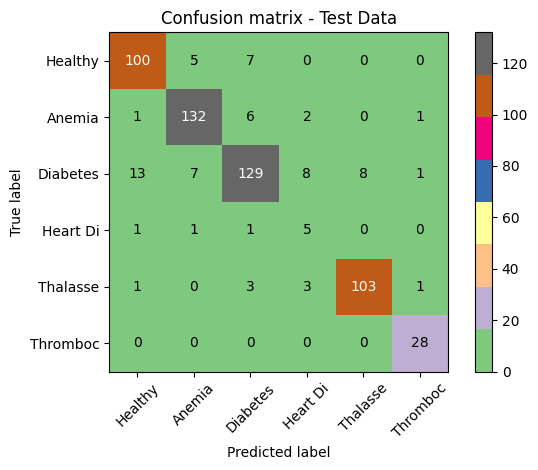

Classification report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       112
           1       0.91      0.93      0.92       142
           2       0.88      0.78      0.83       166
           3       0.28      0.62      0.38         8
           4       0.93      0.93      0.93       111
           5       0.90      1.00      0.95        28

    accuracy                           0.88       567
   macro avg       0.79      0.86      0.81       567
weighted avg       0.89      0.88      0.88       567

Time taken by Logistic Regression:  0.86722731590271  seconds

-------------------------------------------
KNN: 
Model score:  0.8747795414462081
Accuracy of KNN model:  0.8747795414462081
Precision score of KNN model:  0.9296788822985599
Recall score of KNN model:  0.8747795414462081
F1 score of KNN model:  0.8939273547678349
Confuison matrix


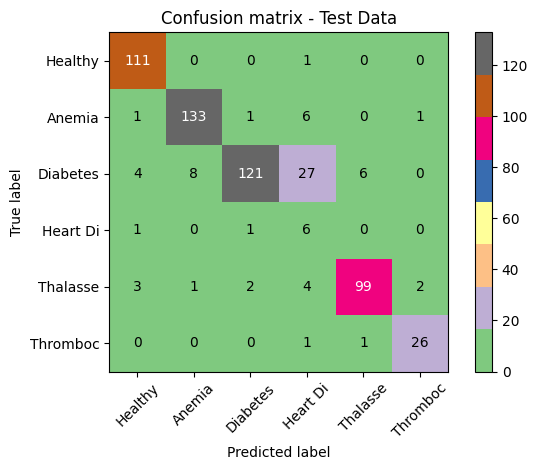

Classification report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       112
           1       0.94      0.94      0.94       142
           2       0.97      0.73      0.83       166
           3       0.13      0.75      0.23         8
           4       0.93      0.89      0.91       111
           5       0.90      0.93      0.91        28

    accuracy                           0.87       567
   macro avg       0.80      0.87      0.80       567
weighted avg       0.93      0.87      0.89       567

Time taken by KNN:  0.7731132507324219  seconds

-------------------------------------------
Decision Tree
Decision Tree with gini criteria
Accuracy:  0.9206349206349206
Precision score:  0.9225307941875883
Recall score:  0.9206349206349206
F1 score:  0.9202312982684258
Confuison matrix


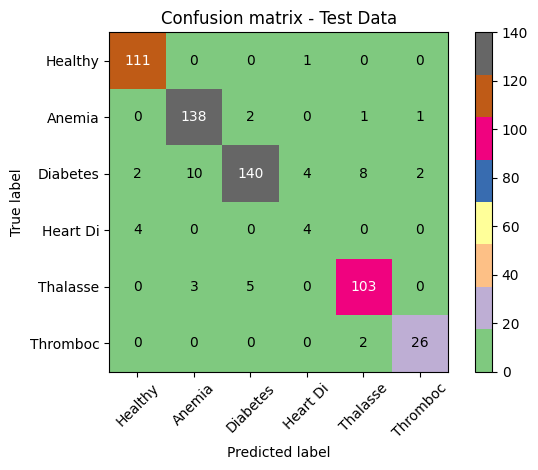

Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       112
           1       0.91      0.97      0.94       142
           2       0.95      0.84      0.89       166
           3       0.44      0.50      0.47         8
           4       0.90      0.93      0.92       111
           5       0.90      0.93      0.91        28

    accuracy                           0.92       567
   macro avg       0.84      0.86      0.85       567
weighted avg       0.92      0.92      0.92       567

Decision Tree with entropy criteria
Accuracy:  0.9153439153439153
Precision score:  0.9201574266982845
Recall score:  0.9153439153439153
F1 score:  0.9162262737348601
Confuison matrix


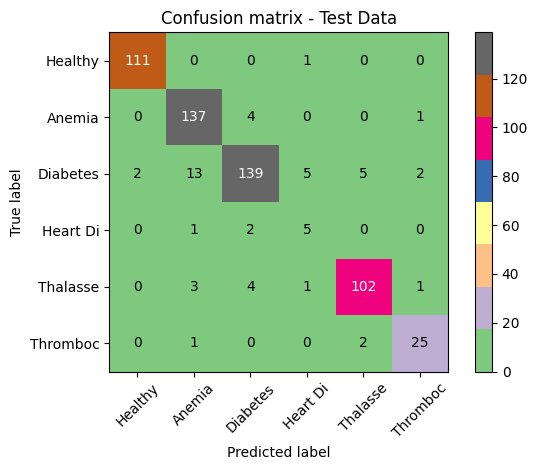

Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.88      0.96      0.92       142
           2       0.93      0.84      0.88       166
           3       0.42      0.62      0.50         8
           4       0.94      0.92      0.93       111
           5       0.86      0.89      0.88        28

    accuracy                           0.92       567
   macro avg       0.84      0.87      0.85       567
weighted avg       0.92      0.92      0.92       567

Time taken by Decision Tree:  1.6724271774291992  seconds

-------------------------------------------
Random Forest: 
Accuracy of Random Forest model:  0.9576719576719577
Precision score of Random Forest model:  0.9612501504764328
Recall score of Random Forest model:  0.9576719576719577
F1 score of Random Forest model:  0.9579246004438842
Confuison matrix


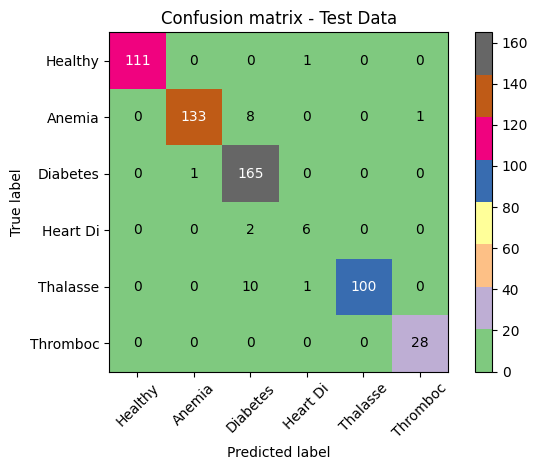

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.99      0.94      0.96       142
           2       0.89      0.99      0.94       166
           3       0.75      0.75      0.75         8
           4       1.00      0.90      0.95       111
           5       0.97      1.00      0.98        28

    accuracy                           0.96       567
   macro avg       0.93      0.93      0.93       567
weighted avg       0.96      0.96      0.96       567

Time taken by Random Forest:  1.2637944221496582  seconds

-------------------------------------------
XGBoost: 
Accuracy of XGBoost model:  0.982363315696649
Precision score of XGBoost model:  0.9859201363760635
Recall score of XGBoost model:  0.982363315696649
F1 score of XGBoost model:  0.9837067870730555
Confuison matrix


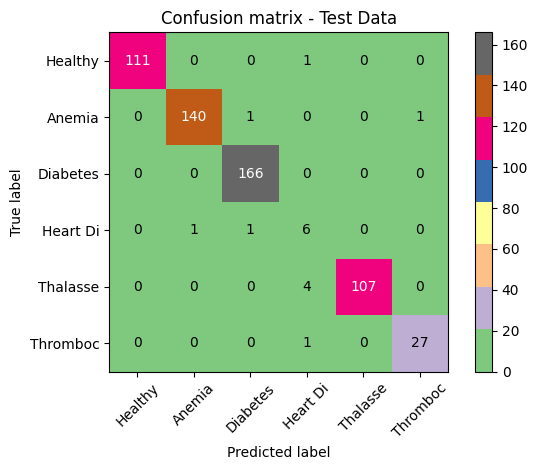

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.99      0.99      0.99       142
           2       0.99      1.00      0.99       166
           3       0.50      0.75      0.60         8
           4       1.00      0.96      0.98       111
           5       0.96      0.96      0.96        28

    accuracy                           0.98       567
   macro avg       0.91      0.94      0.92       567
weighted avg       0.99      0.98      0.98       567

Time taken by XGBoost:  1.0303688049316406  seconds

-------------------------------------------


In [26]:
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print("Logistic Regression: ")
start_time = time.time()
results = LogisticModel(results, X_train, y_train, X_test, y_test)
print("Time taken by Logistic Regression: ", (time.time()-start_time), " seconds")
print()
print("-------------------------------------------")

print("KNN: ")
start_time = time.time()
results = KNNModel(results, X_train, y_train, X_test, y_test)
print("Time taken by KNN: ", (time.time()-start_time), " seconds")
print()
print("-------------------------------------------")

print("Decision Tree")
start_time = time.time()
results = DecisionTreeModel(results, X_train, y_train, X_test, y_test)
print("Time taken by Decision Tree: ", (time.time()-start_time), " seconds")
print()
print("-------------------------------------------")

print("Random Forest: ")
start_time = time.time()
results = RandomForestModel(results, X_train, y_train, X_test, y_test)
print("Time taken by Random Forest: ", (time.time()-start_time), " seconds")
print()
print("-------------------------------------------")

print("XGBoost: ")
start_time = time.time()
results = XGBoost(results, X_train, y_train, X_test, y_test)
print("Time taken by XGBoost: ", (time.time()-start_time), " seconds")
print()
print("-------------------------------------------")

In [27]:
results

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.876543,0.887133,0.876543,0.879697
1,KNN,0.874780,0.929679,0.874780,0.893927
2,Decision Tree with gini criteria,0.920635,0.922531,0.920635,0.920231
3,Decision Tree with entropy criteria,0.915344,0.920157,0.915344,0.916226
4,Random Forest Classfier,0.957672,0.961250,0.957672,0.957925
5,XGBoost,0.982363,0.985920,0.982363,0.983707


XGBoost is performing well. So picking XGBoost for the prediction.

#**Model Tuning**

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Define the parameter grid
param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 10),
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],
    'gamma': [i/10.0 for i in range(0, 5)],
    'colsample_bytree': [i/10.0 for i in range(7, 10)],
    'subsample': [i/10.0 for i in range(7, 10)]
}

# Initialize XGBClassifier for multi-class classification
xgb = XGBClassifier(objective='multi:softmax', num_class=6, base_score=0.5, booster='gbtree', colsample_bylevel=1)

# Initialize RandomizedSearchCV with random_state=100
gsearch1 = RandomizedSearchCV(estimator=xgb, param_distributions=param_test, n_iter=5, scoring=make_scorer(accuracy_score), cv=5, verbose=2, random_state=100, n_jobs=-1)

# Perform RandomizedSearchCV
gsearch1.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", gsearch1.best_params_)
print("Best Score:", gsearch1.best_score_)

# Evaluate the model on the test set
y_pred = gsearch1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 80, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.9967577934066207
Test Accuracy: 0.9876543209876543


#**Final Creation of Best Model**

In [30]:
def plot_confusion_matrix(y_true, y_pred):
    category_names = ['Healthy', 'Anemia', 'Diabetes', 'Heart Di', 'Thalasse', 'Thromboc']
    cm = confusion_matrix(y_true, y_pred)
    plt.clf()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(category_names))
    plt.xticks(ticks, category_names, rotation=45)
    plt.yticks(ticks, category_names, rotation=315)
    plt.show()


Test Set Evaluation:
Accuracy: 99.29 %
Precision: 99.32 %
Recall: 99.29 %
F1-score: 99.30 %
--------------------------
Confusion matrix


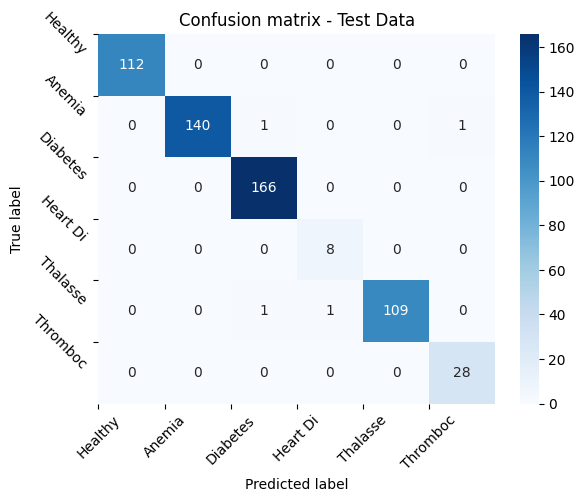

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      0.99      0.99       142
           2       0.99      1.00      0.99       166
           3       0.89      1.00      0.94         8
           4       1.00      0.98      0.99       111
           5       0.97      1.00      0.98        28

    accuracy                           0.99       567
   macro avg       0.97      0.99      0.98       567
weighted avg       0.99      0.99      0.99       567



In [31]:
# Best parameters from RandomizedSearchCV
best_params = {
    'subsample': 0.9,
    'n_estimators': 80,
    'min_child_weight': 5,
    'max_depth': 7,
    'learning_rate': 0.2,
    'gamma': 0.2,
    'colsample_bytree': 0.9
}

# Initialize the XGBClassifier with the best parameters
xgb_best = XGBClassifier(
    objective='multi:softmax',
    num_class=6,
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    subsample=best_params['subsample'],
    n_estimators=best_params['n_estimators'],
    min_child_weight=best_params['min_child_weight'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    gamma=best_params['gamma'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=100  # to ensure reproducibility
)

# Train the model on the training data
xgb_best.fit(X_train, y_train)

# Predict on the test set
pred = xgb_best.predict(X_test)

Accuracy = accuracy_score(y_test, pred)
Precision = precision_score(y_test, pred, average='weighted')
Recall = recall_score(y_test, pred, average='weighted')
F1 = f1_score(y_test, pred, average='weighted')
print("\nTest Set Evaluation:")
print("Accuracy: {:.2f} %".format(Accuracy * 100))
print("Precision: {:.2f} %".format(Precision * 100))
print("Recall: {:.2f} %".format(Recall * 100))
print("F1-score: {:.2f} %".format(F1 * 100))
print("--------------------------")
print("Confusion matrix")
plot_confusion_matrix(y_test, pred)
print("Classification report")
print(classification_report(y_test, pred))



#**Conclusion**

As the given dataset is imbalanced, oversampling is performed. After oversampling, different models are trained on this dataset and performances are observed. Of all the models taken XGBoost performs better. Then model is tuned
to get best hyper parameters. Then finally I craeted XGBoost model with the found best hyperparameters.

Test Set Evaluation:
Accuracy: 99.29 %
Precision: 99.32 %
Recall: 99.29 %
F1-score: 99.30 %